In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import folium
from folium.plugins import HeatMap

In [2]:
datasets = {
    "Ariyalur": pd.read_excel("/content/Ariyalur.xlsx"),
    "Chennai": pd.read_excel("/content/Chennai.xlsx"),
    "Coimbatore": pd.read_excel("/content/Coimbatore City.xlsx"),
    "Cuddalore": pd.read_excel("/content/Cuddalore.xlsx"),
    "Dharmapuri": pd.read_excel("/content/Dharmapuri.xlsx"),
    "Dindigul": pd.read_excel("/content/Dindugal.xlsx"),
    "Erode": pd.read_excel("/content/Erode.xlsx"),
    "Kanchipuram": pd.read_excel("/content/Kancheepuram.xlsx"),
    "Kanniyakumari": pd.read_excel("/content/Kanniyakumari.xlsx"),
    "Karur": pd.read_excel("/content/Karur.xlsx"),
    "Krishnagiri": pd.read_excel("/content/Krishnagiri.xlsx"),
    "Madurai": pd.read_excel("/content/Madurai.xlsx"),
    "Nagapattinam": pd.read_excel("/content/NagaPattinam.xlsx"),
    "Namakkal": pd.read_excel("/content/Namakkal.xlsx"),
    "Nilgiris": pd.read_excel("/content/Nilgiris.xlsx"),
    "Perambalur": pd.read_excel("/content/Perambalur.xlsx"),
    "Pudukkottai": pd.read_excel("/content/Pudukottai.xlsx"),
    "Ramanathapuram": pd.read_excel("/content/Ramanathapuram.xlsx"),
    "Salem": pd.read_excel("/content/Salem.xlsx"),
    "Sivagangai": pd.read_excel("/content/Sivagangai.xlsx"),
    "Thanjavur": pd.read_excel("/content/Thanjavur.xlsx"),
    "Theni": pd.read_excel("/content/Theni.xlsx"),
    "Tirunelveli": pd.read_excel("/content/Tirunelveli.xlsx"),
    "Tiruppur": pd.read_excel("/content/Tiruppur.xlsx"),
    "Tiruvallur": pd.read_excel("/content/Tiruvallur.xlsx"),
    "Tiruvannamalai": pd.read_excel("/content/Tiruvannamalai.xlsx"),
    "Tiruvarur": pd.read_excel("/content/Tiruvarur.xlsx"),
    "Vellore": pd.read_excel("/content/Vellore.xlsx"),
    "Viluppuram": pd.read_excel("/content/Villupuram.xlsx"),
    "Virudhunagar": pd.read_excel("/content/Virudhunagar.xlsx")
}


In [3]:
for district, data in datasets.items():
    print(f"Columns in {district}: {data.columns.tolist()}")
    break  # Only print the first district's columns


Columns in Ariyalur: ['Event type', datetime.datetime(2018, 1, 18, 0, 0), datetime.datetime(2018, 1, 19, 0, 0), datetime.datetime(2018, 1, 20, 0, 0), datetime.datetime(2018, 1, 21, 0, 0), datetime.datetime(2018, 1, 22, 0, 0), datetime.datetime(2018, 1, 23, 0, 0), datetime.datetime(2018, 1, 24, 0, 0), datetime.datetime(2018, 1, 25, 0, 0), datetime.datetime(2018, 1, 26, 0, 0), datetime.datetime(2018, 1, 27, 0, 0), datetime.datetime(2018, 1, 28, 0, 0), datetime.datetime(2018, 1, 29, 0, 0), datetime.datetime(2018, 1, 30, 0, 0), datetime.datetime(2018, 1, 31, 0, 0), datetime.datetime(2018, 2, 1, 0, 0), datetime.datetime(2018, 2, 2, 0, 0), datetime.datetime(2018, 2, 3, 0, 0), datetime.datetime(2018, 2, 4, 0, 0), datetime.datetime(2018, 2, 5, 0, 0), datetime.datetime(2018, 2, 6, 0, 0), datetime.datetime(2018, 2, 7, 0, 0), datetime.datetime(2018, 2, 8, 0, 0), datetime.datetime(2018, 2, 9, 0, 0), datetime.datetime(2018, 2, 10, 0, 0), datetime.datetime(2018, 2, 11, 0, 0), datetime.datetime(2018,

In [12]:
df_list = []
for district, data in datasets.items():
    # Convert column names to strings and strip spaces
    data.columns = data.columns.astype(str).str.strip()

    # Drop "Grand Total" column if it exists
    if "Grand Total" in data.columns:
        data = data.drop(columns=["Grand Total"], errors="ignore")

    # Rename "Event type" to "Crime_Type"
    data.rename(columns={"Event type": "Crime_Type"}, inplace=True)

    # Add the district column
    data["District"] = district

    # Identify date columns (ignore "Crime_Type" and "District")
    date_cols = [col for col in data.columns if col not in ["Crime_Type", "District"]]

    # Convert the dataset to long format
    data = data.melt(id_vars=["Crime_Type", "District"],
                     value_vars=date_cols,
                     var_name="Date",
                     value_name="Crime_Count")

    # Ensure "Date" is in correct datetime format
    data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

    # Drop NaN values in "Crime_Count"
    data.dropna(subset=["Crime_Count"], inplace=True)

    df_list.append(data)

# Combine all data
if df_list:
    df = pd.concat(df_list, ignore_index=True)
    display(df.head())
    display(df.info())
else:
    print("❌ No valid data found.")

crime_df = pd.concat(crime_data, ignore_index=True)

,Crime_Type,District,Date,Crime_Count
0,FIGHTING,Ariyalur,2018-01-18,0
1,THEFT / ROBBERY,Ariyalur,2018-01-18,0
2,PROHIBITION RELATED (GANJA / GUTKA / ARRACK / ...,Ariyalur,2018-01-18,0
3,NUISANCE / DISTURBANCE,Ariyalur,2018-01-18,1
4,GAMBLING / BETTING,Ariyalur,2018-01-18,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399944 entries, 0 to 399943
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Crime_Type   399944 non-null  object        
 1   District     399944 non-null  object        
 2   Date         399944 non-null  datetime64[ns]
 3   Crime_Count  399944 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 12.2+ MB


None

In [5]:
df.dropna(inplace=True)

In [15]:

df_list = []
for district, data in datasets.items():
    data.columns = data.columns.astype(str).str.strip()
    if "Grand Total" in data.columns:
        data = data.drop(columns=["Grand Total"], errors="ignore")
    data.rename(columns={"Event type": "Crime_Type"}, inplace=True)
    data["District"] = district
    date_cols = [col for col in data.columns if col not in ["Crime_Type", "District"]]
    data = data.melt(id_vars=["Crime_Type", "District"],
                     value_vars=date_cols,
                     var_name="Date",
                     value_name="Crime_Count")
    data["Date"] = pd.to_datetime(data["Date"], errors="coerce")
    data.dropna(subset=["Crime_Count"], inplace=True)
    df_list.append(data)

if df_list:
    df = pd.concat(df_list, ignore_index=True)
    display(df.head())
    display(df.info())
else:
    print("❌ No valid data found.")


,Crime_Type,District,Date,Crime_Count
0,FIGHTING,Ariyalur,2018-01-18,0
1,THEFT / ROBBERY,Ariyalur,2018-01-18,0
2,PROHIBITION RELATED (GANJA / GUTKA / ARRACK / ...,Ariyalur,2018-01-18,0
3,NUISANCE / DISTURBANCE,Ariyalur,2018-01-18,1
4,GAMBLING / BETTING,Ariyalur,2018-01-18,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399944 entries, 0 to 399943
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Crime_Type   399944 non-null  object        
 1   District     399944 non-null  object        
 2   Date         399944 non-null  datetime64[ns]
 3   Crime_Count  399944 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 12.2+ MB


None

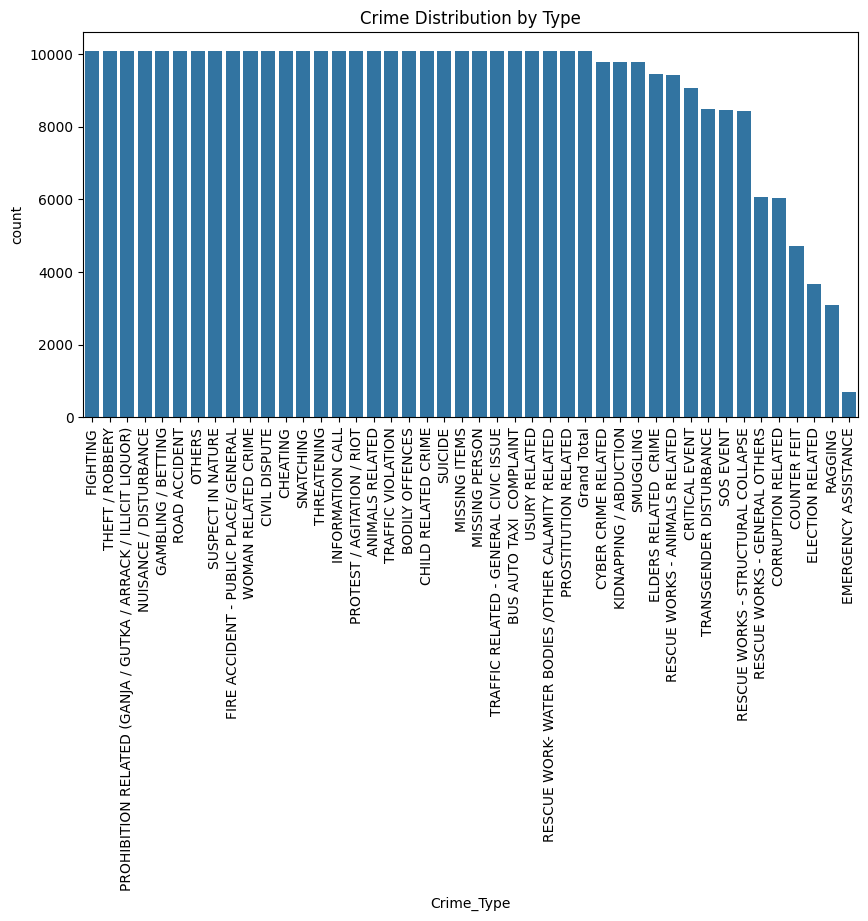

In [27]:

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Crime_Type', order=df['Crime_Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crime Distribution by Type")
plt.show()




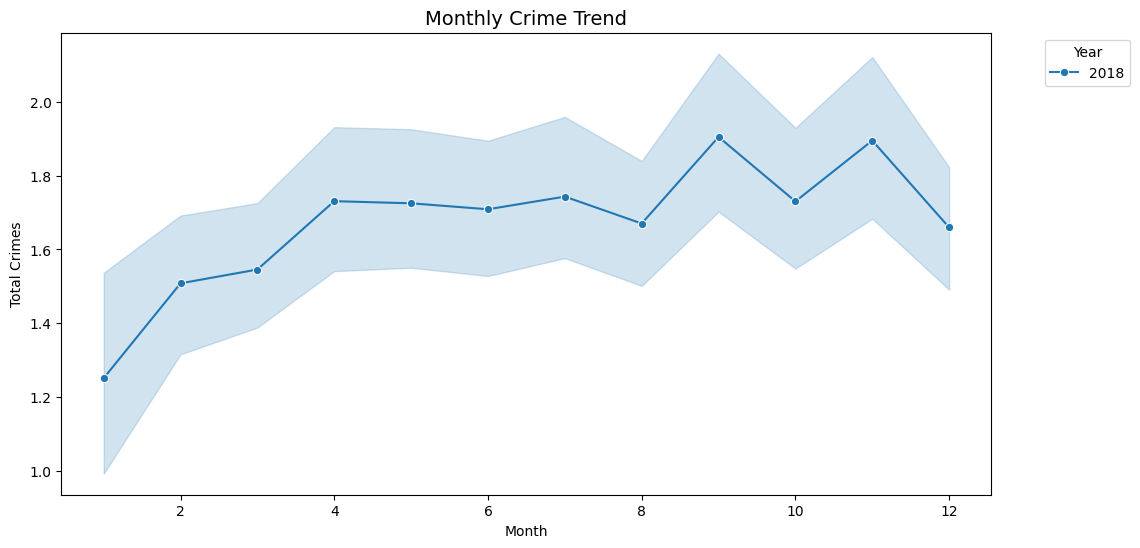

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Crime_Count", hue="Year", marker="o", palette="tab10")
plt.title("Monthly Crime Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Total Crimes")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


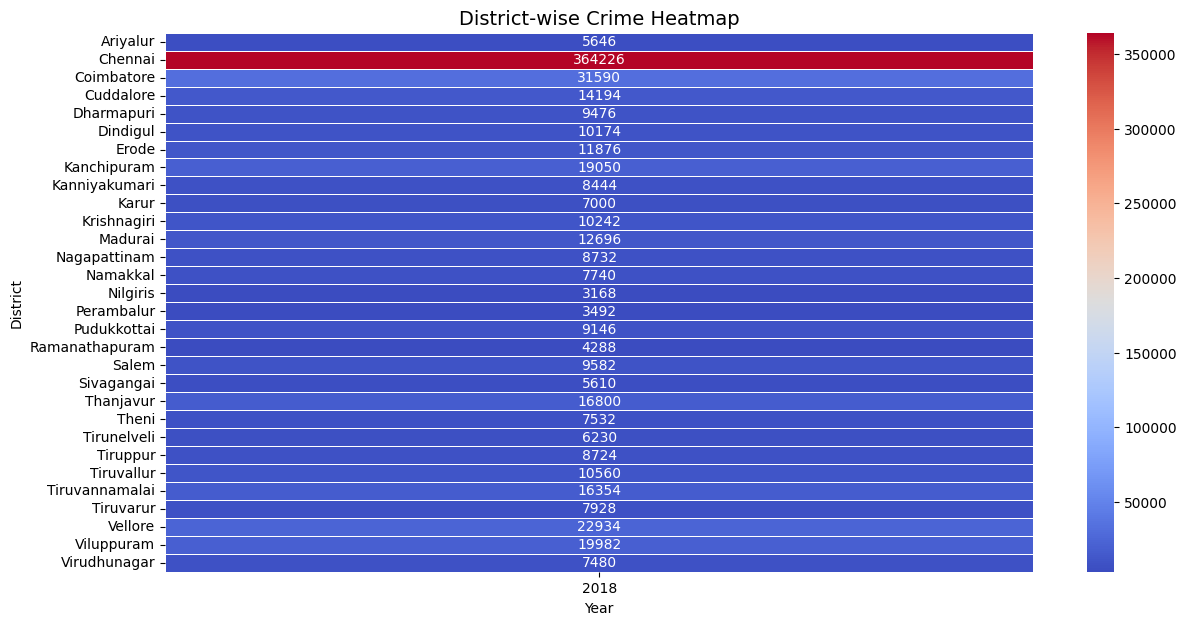

In [24]:
plt.figure(figsize=(14, 7))
district_pivot = df.pivot_table(values="Crime_Count", index="District", columns="Year", aggfunc="sum")
sns.heatmap(district_pivot, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f")
plt.title("District-wise Crime Heatmap", fontsize=14)
plt.ylabel("District")
plt.xlabel("Year")
plt.show()


<ipython-input-25-121bf2b4085d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="magma")


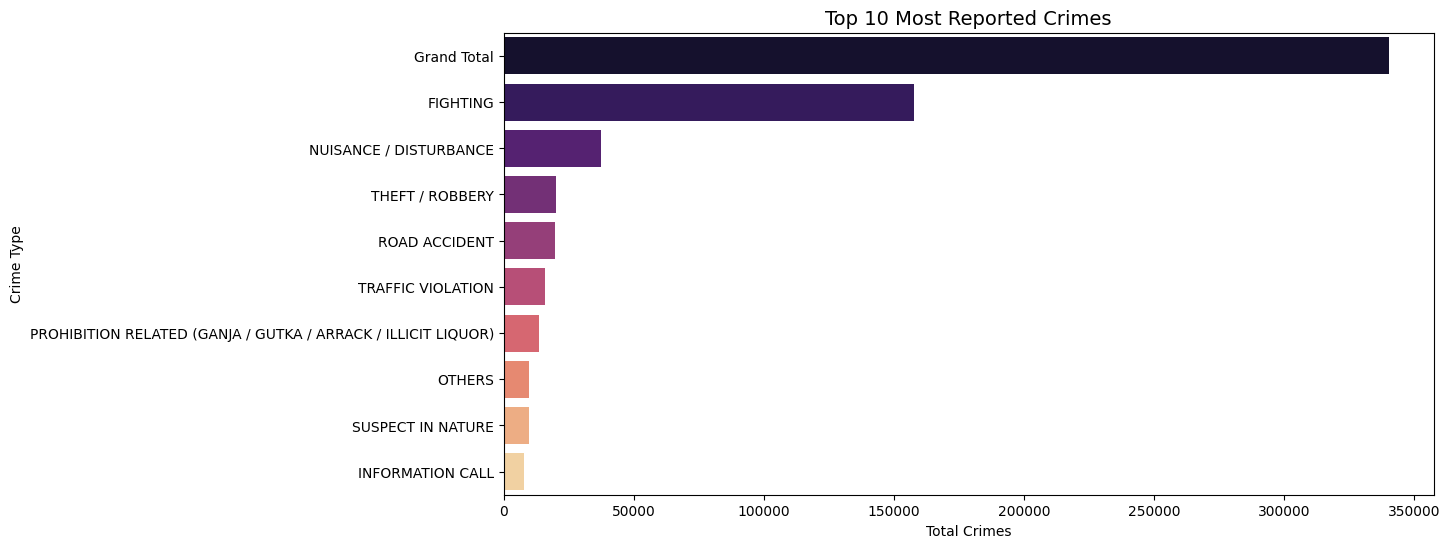

In [25]:
plt.figure(figsize=(12, 6))
top_crimes = df.groupby("Crime_Type")["Crime_Count"].sum().nlargest(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette="magma")
plt.title("Top 10 Most Reported Crimes", fontsize=14)
plt.xlabel("Total Crimes")
plt.ylabel("Crime Type")
plt.show()

<ipython-input-26-a9061575ee5d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Year", y="Crime_Count", palette="coolwarm")


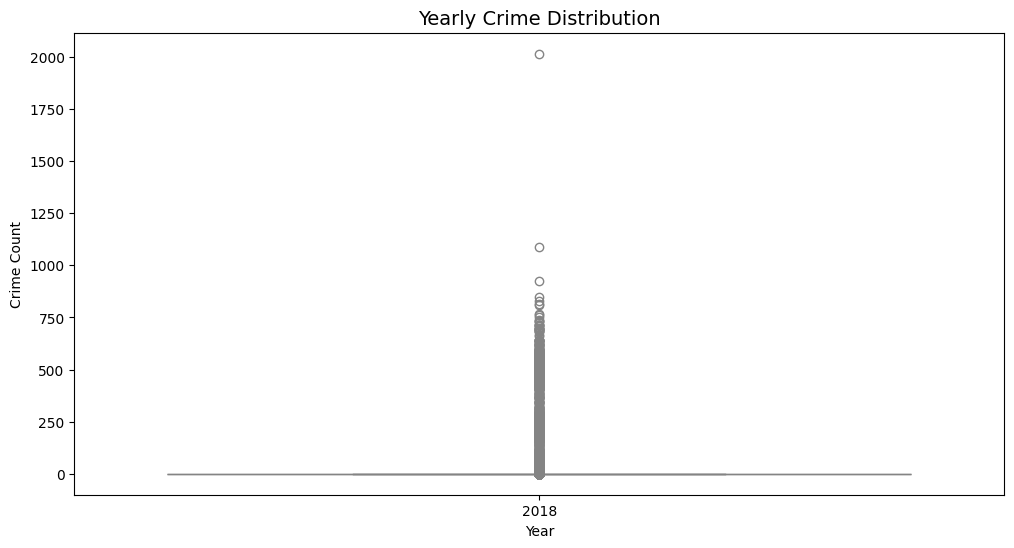

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Year", y="Crime_Count", palette="coolwarm")
plt.title("Yearly Crime Distribution", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.show()

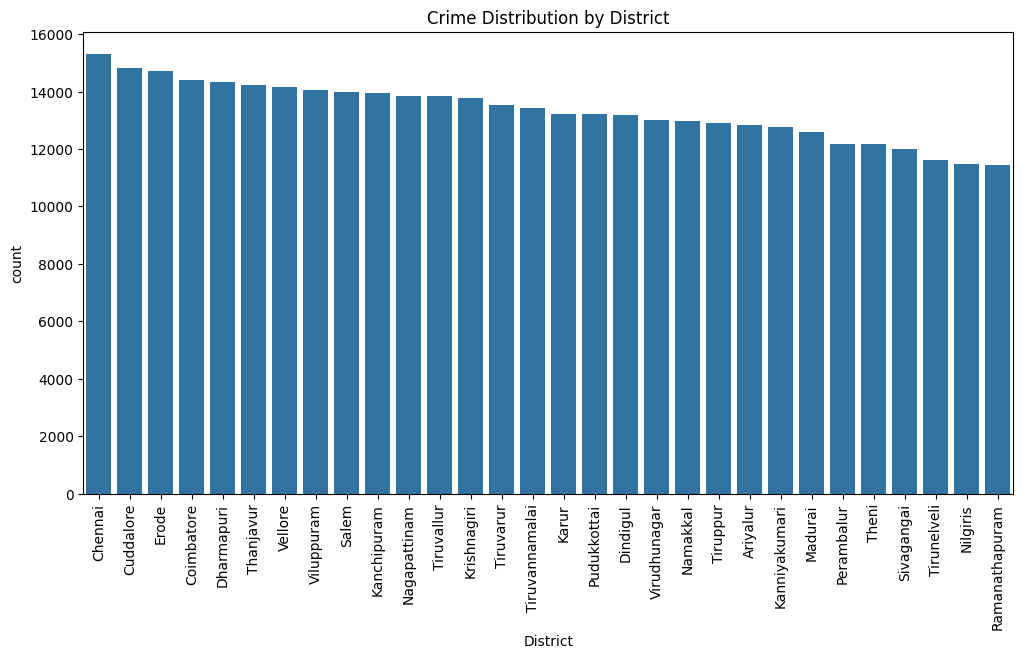

In [28]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='District', order=df['District'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Crime Distribution by District")
plt.show()


<ipython-input-29-55e6aff2e646>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Date', y='Crime_Count', hue='Crime_Type', ci=None)


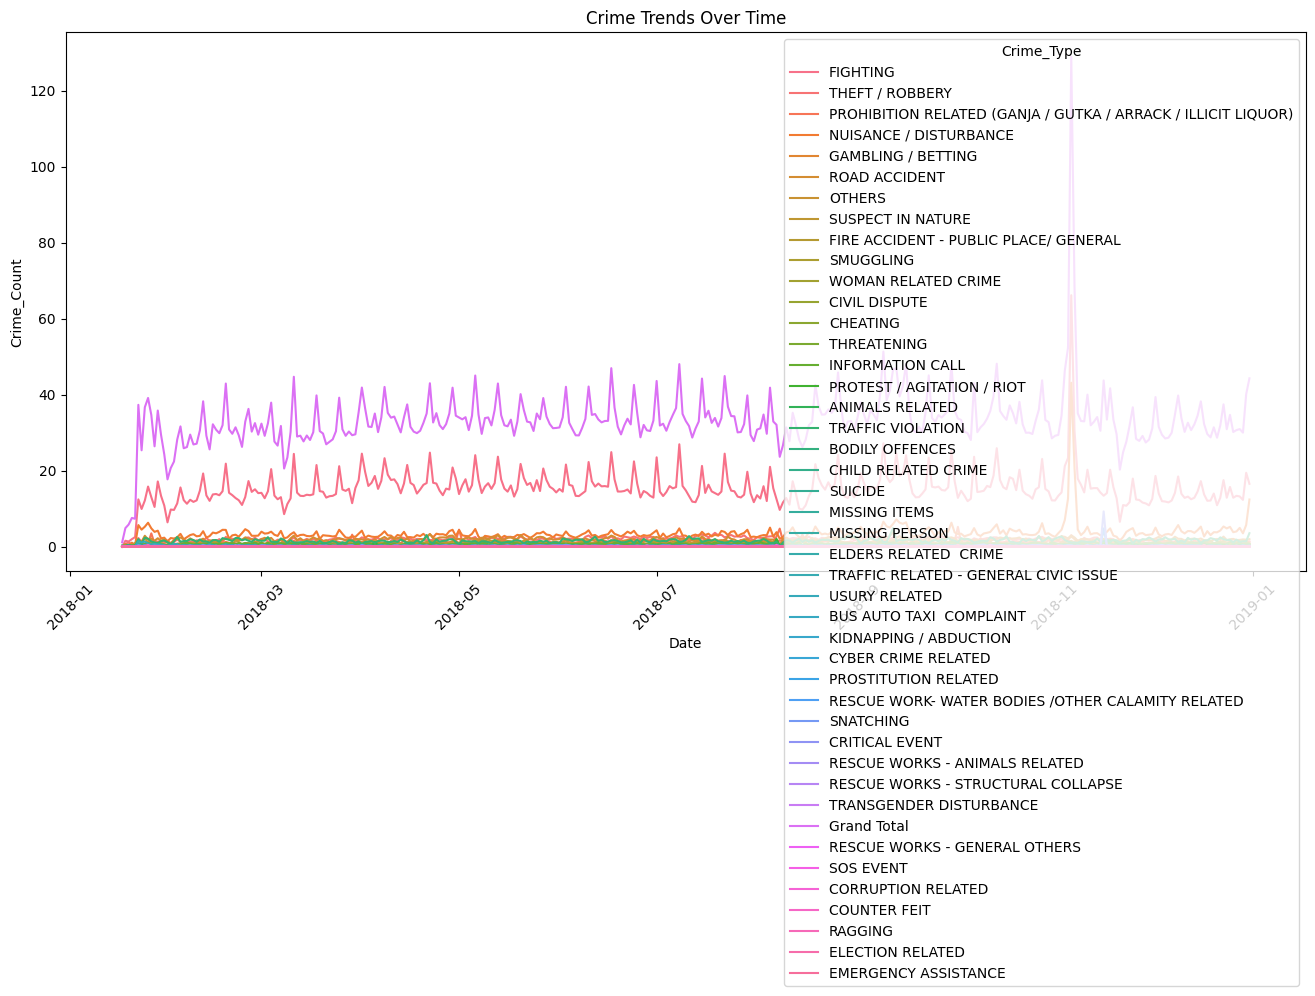

In [29]:

plt.figure(figsize=(16, 7))
sns.lineplot(data=df, x='Date', y='Crime_Count', hue='Crime_Type', ci=None)
plt.xticks(rotation=45)
plt.title("Crime Trends Over Time")
plt.show()